In [63]:
import time
import sys
sys.path.append('../')
from pinn_magnetic_experimental import MultiDipoleModel
import smtf_utility as util

In [64]:
def percentage(input, predicted):
    adiff = abs(input-predicted)
    delta = 0
    if input > adiff:
        delta = input - adiff
    else:
        delta = adiff + input
    
    return ((delta/input) * 100)

In [65]:
sim = util.bf_simulator(distances=[1, 1.33, 1.66, 1.99], delta=30, scale=1e9)

xpole = 0.1
ypole = 0.2
zpole = -0.6

sim.add_dipole(0.0, 0, 0, xpole, 0, 0)
sim.add_dipole(0.0, 0, 0, 0, ypole, 0)
sim.add_dipole(0.0, 0, 0, 0, 0, zpole)

In [66]:
positions, values = sim.get_data()
positions, values = util.shuffle_data(positions, values)

In [67]:
model = MultiDipoleModel(poles=1, lrate=0.02, optimizer='adagrad', loss='mse', scale=1e9, early_stop=False, target_stop=.000000002)
test_epochs = 500

In [68]:
start = time.time()
model.fit(positions, values, epochs=test_epochs)
end = time.time()

epoch  0 --- Loss --- 244.75113
epoch  1 --- Loss --- 150.67604
epoch  2 --- Loss --- 111.37703
epoch  3 --- Loss --- 86.35191
epoch  4 --- Loss --- 68.50352
epoch  5 --- Loss --- 55.09164
epoch  6 --- Loss --- 44.71364
epoch  7 --- Loss --- 36.53031
epoch  8 --- Loss --- 29.991867
epoch  9 --- Loss --- 24.71683
epoch  10 --- Loss --- 20.429756
epoch  11 --- Loss --- 16.925808
epoch  12 --- Loss --- 14.049115
epoch  13 --- Loss --- 11.678969
epoch  14 --- Loss --- 9.720625
epoch  15 --- Loss --- 8.098791
epoch  16 --- Loss --- 6.7531023
epoch  17 --- Loss --- 5.634846
epoch  18 --- Loss --- 4.704408
epoch  19 --- Loss --- 3.9294336
epoch  20 --- Loss --- 3.2833726
epoch  21 --- Loss --- 2.7444098
epoch  22 --- Loss --- 2.294515
epoch  23 --- Loss --- 1.9187984
epoch  24 --- Loss --- 1.6049005
epoch  25 --- Loss --- 1.3425627
epoch  26 --- Loss --- 1.123255
epoch  27 --- Loss --- 0.93986326
epoch  28 --- Loss --- 0.78648704
epoch  29 --- Loss --- 0.658194
epoch  30 --- Loss --- 0.550866

In [69]:
ellapsed_minutes = ((end - start) / 60)
print("Total training time: " + str(ellapsed_minutes) + " minutes")

Total training time: 5.558303590615591 minutes


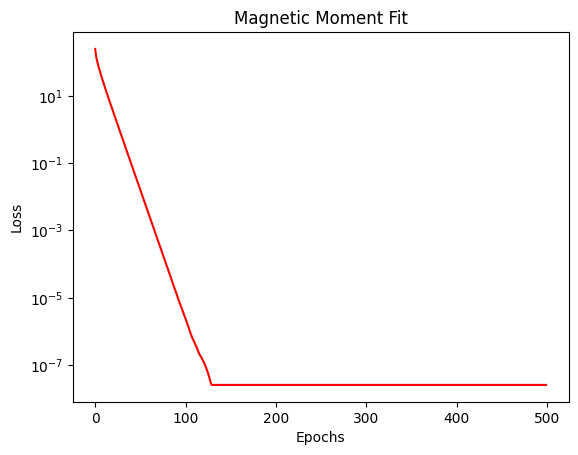

In [70]:
import matplotlib.pyplot as plt

y_axis = model.loss_history
x_axis = [*range(0, len(y_axis), 1)]

plt.plot(x_axis, y_axis, 'r-')
plt.yscale("log")
#plt.xscale("log")
plt.title('Magnetic Moment Fit')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [71]:
print("Predicted")
print(model.dipole())
print("Input")
print([[xpole, ypole, zpole]])

Predicted
[[ 0.1         0.19999991 -0.599995  ]]
Input
[[0.1, 0.2, -0.6]]


In [72]:
est = model.dipole()

#x_acc = ((xpole - abs(xpole - est[-1][0]))/xpole) * 100.0
#y_acc = ((ypole - abs(ypole - est[-1][1]))/ypole) * 100.0
#z_acc = ((zpole - abs(zpole - est[-1][2]))/zpole) * 100.0
x_acc = percentage( xpole, est[-1][0])
y_acc = percentage(ypole, est[-1][1])
z_acc = percentage(zpole, est[-1][2])
print("Percentage Accuracy X-axis", x_acc)
print("Percentage Accuracy Y-axis", y_acc)
print("Percentage Accuracy Z-axis", z_acc)

print("********************************")
overall_acc = (x_acc + y_acc + z_acc)/3
print("Average Accuracy: ", overall_acc)



Percentage Accuracy X-axis 99.9999985098839
Percentage Accuracy Y-axis 99.99995678663254
Percentage Accuracy Z-axis 99.99916950861613
********************************
Average Accuracy:  99.99970826837752
